# This code was designed to prove that we can make an estimator that works for an arbitrary function

# This code is meant to be run by Tensorflow 2.0 under Conda, the conda environment creating file is provided in the base folder of this repository

## The cell bellow suppresses the warnings from tf and other packages that are overly verbose

In [1]:
import warnings
warnings.filterwarnings('ignore')

## The imports are self explanatory

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Using TensorFlow backend.


# <span style="color:red">This function has been changed to a gaussian version of itself to test the generalization properties of the network</span>
## This function generates the dataset points for the test, feel free to modify it as you wish to see if the network can still fit it

In [3]:
def generatePointsGaussian(vector_size,samples,deviation = 0.2):
    x = np.linspace(-np.pi*5/2,np.pi*5/2,vector_size)
    xmatrix = []
    ymatrix = []
    for i in range(0,samples):
        ymatrix.append(np.zeros(vector_size))
        xmatrix.append(x)
    xvector = np.array(xmatrix).reshape((vector_size*samples,))
    yvector = np.array(ymatrix).reshape((vector_size*samples,))
    for j in range(0,len(xvector)):
        yvector[j] = np.cos(xvector[j]) + np.random.normal(scale = deviation)
    return xvector,yvector

In [4]:
def generatePoints(vector_size):
    x = np.zeros(vector_size)
    y = np.zeros(vector_size)
    for i in range(0,len(x)):
        x[i] = np.random.random()*np.pi*5 - np.pi*5/2
        y[i] = np.cos(x[i])
    return x,y

## This cell and the graph bellow are here as debug, showing how the function works

In [5]:
generatePointsGaussian(5,2)

(array([-7.85398163, -3.92699082,  0.        ,  3.92699082,  7.85398163,
        -7.85398163, -3.92699082,  0.        ,  3.92699082,  7.85398163]),
 array([-0.04794717, -0.86707185,  0.80873177, -0.8221222 ,  0.19884704,
        -0.32876931, -0.33333233,  0.71072418, -0.86194257, -0.28845854]))

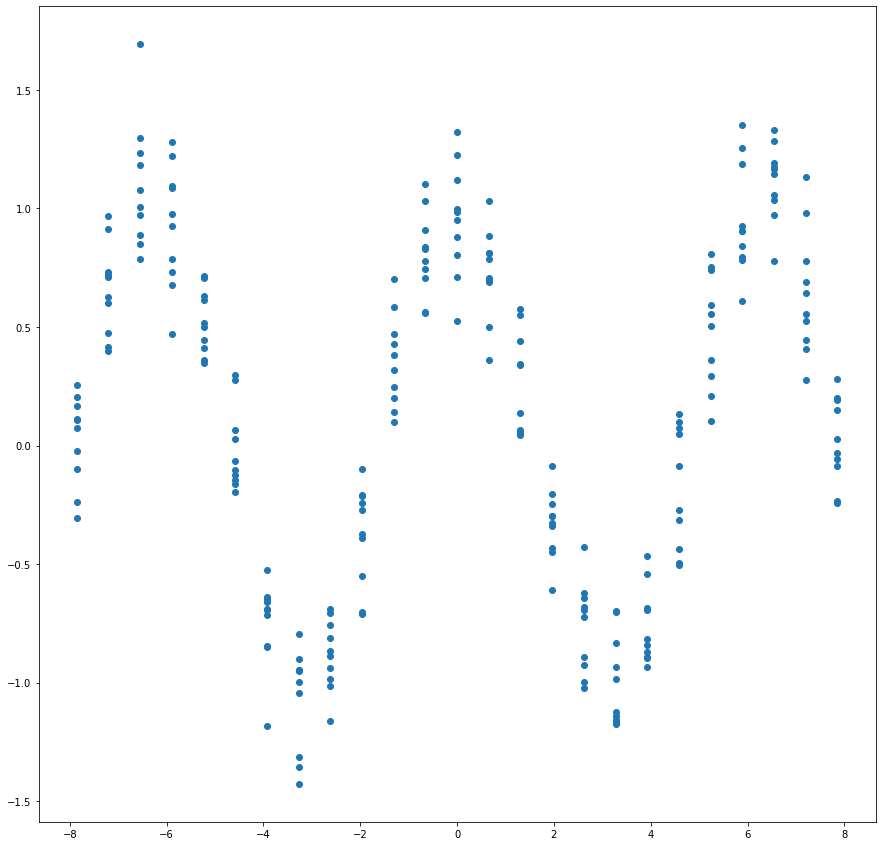

In [6]:
plt.figure(figsize=(15,15))
plt.scatter(*generatePointsGaussian(25,10))

## The neural network model bellow implements a simple neural network with fully connected layers that fits the data

In [7]:
model = Sequential()
model.add(Dense(100,input_shape = (1,),activation = "linear"))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(1,activation="linear"))
adamOptimizer = keras.optimizers.Adam(learning_rate=0.0001)
sgdOptimizer = keras.optimizers.SGD(momentum = 0.9, nesterov = True)
RMSpropOptimizer = keras.optimizers.RMSprop(learning_rate = 0.001, decay = 1e-5)
AdadeltaOptimizer = keras.optimizers.Adadelta()
model.compile(loss = 'mse', optimizer = sgdOptimizer, metrics = ['mse','mae'])

## Generate the data that will be used in the training and testing of the model

In [8]:
xtrain, ytrain = generatePointsGaussian(100,10,deviation=0.3)
xtest, ytest = generatePoints(50)

## The training phase is logged to a cache that is used bellow to show the network's progress over the epochs of training

In [ ]:
history_cache = model.fit(xtrain,
                          ytrain,
                          epochs=1000,
                          batch_size=10,
                          validation_data=(xtest,ytest),
                          verbose = 1
                         )

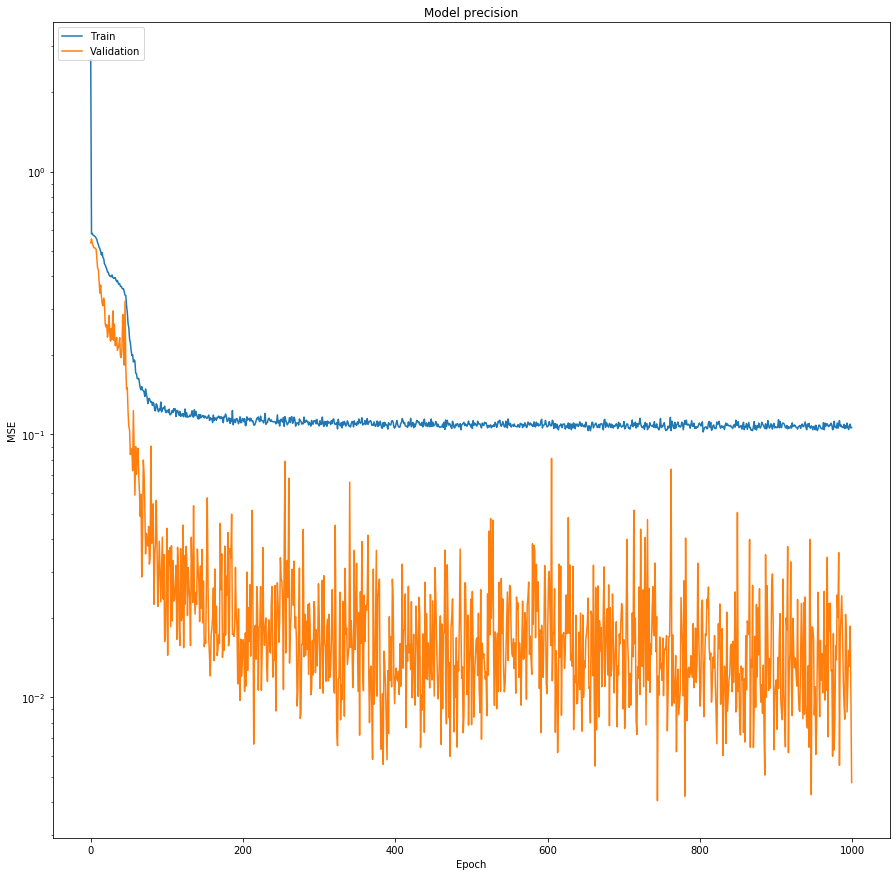

In [10]:
plt.figure(figsize=(15,15))
plt.plot(history_cache.history['mse'])
plt.plot(history_cache.history['val_mse'])
plt.title('Model precision')
plt.ylabel('MSE')
plt.yscale("log")
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')

## This graph bellow is showing the actual learned function with the blue line, the blue dots are the training points we used and the yellow are the test points

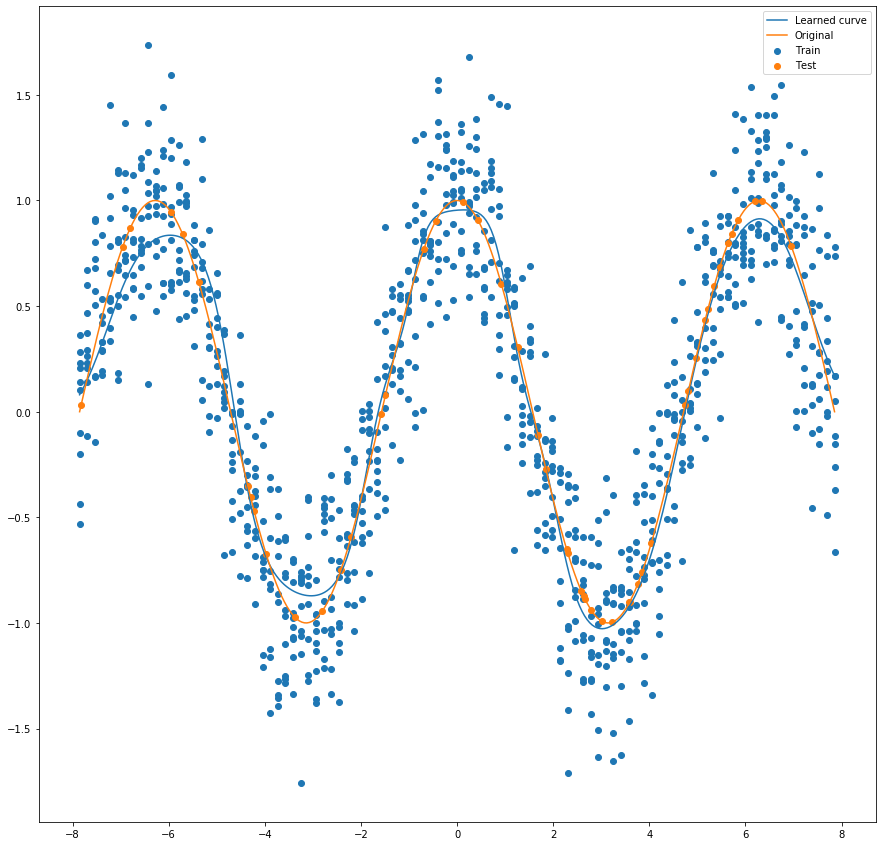

In [11]:
xpredict = np.linspace(-np.pi*5/2,np.pi*5/2,300)
ypredict = model.predict(xpredict)
plt.figure(figsize=(15,15))
plt.plot(xpredict,ypredict)
plt.plot(xpredict,np.cos(xpredict))
plt.scatter(xtrain,ytrain)
plt.scatter(xtest,ytest)
plt.legend(['Learned curve','Original','Train','Test'])

## Now we can calculate the R² value for this regressor to assess the performance of the network

In [12]:
originalFunction = np.cos(xpredict)
r2_score(ypredict,originalFunction)

0.9838061533399198